In [119]:
%pylab inline
import pylab as pl
import seaborn as sns
sns.set_style("whitegrid")
import pandas as pd
# data from 
# http://scioperi.mit.gov.it/mit2/public/scioperi/ricerca

Populating the interactive namespace from numpy and matplotlib


In [181]:
dateparse = lambda x: pd.datetime.strptime(x, '%d/%m/%Y')
data=pd.read_csv("data/Scioperi - mit2.csv",parse_dates=['Inizio','Fine'],date_parser=dateparse)

In [233]:
VE=((data.Rilevanza=='Regionale') & ((data.Regione=='Veneto')))
TN=((data.Rilevanza=='Regionale') & ((data.Regione=='Trentino')))
WHERE=((data.Rilevanza=='Nazionale') |  TN|VE)
DONE=data.Stato=='Effettuato'

_=data[DONE & WHERE].Inizio # be carefull.. I'm counting multi-day strikes as 1 day strikes (probably not a problem)
strikes=_.drop_duplicates()


In [234]:
diff=strikes.diff()
days=[j.days for j in diff.tolist()[1:]]


650


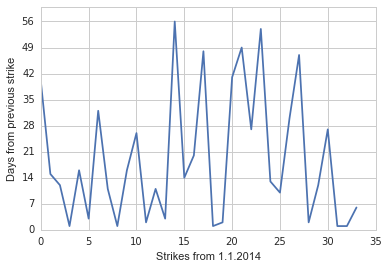

In [235]:
pl.plot(days)
pl.xlabel("Strikes from 1.1.2014")
pl.ylabel("Days from previous strike")
pl.gca().yaxis.set_ticks(range(0,60,7))
print np.sum(days)

In [236]:
print ' '.join(["{0:d}".format(j) for j in days])


40 15 12 1 16 3 32 11 1 16 26 2 11 3 56 14 20 48 1 2 41 49 27 54 13 10 30 47 2 12 27 1 1 6


In [237]:
N=max(days)+1
pm=np.zeros((N,N),dtype=int)
for i,j in enumerate(days[:-1]):
    pm[j,days[i+1]]+=1

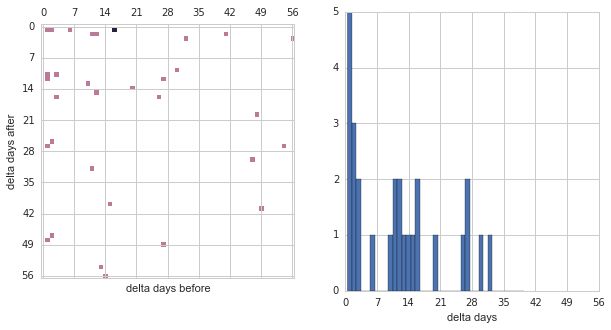

In [238]:
fig,(ax,bx)=pl.subplots(1,2,figsize=(10,5))
ticks=np.arange(0,N,7)
ax.matshow(pm,cmap= sns.cubehelix_palette(light=1, as_cmap=True))
ax.xaxis.set_ticks(ticks)
ax.yaxis.set_ticks(ticks)
ax.set_xlabel("delta days before")
ax.set_ylabel("delta days after")

bx.hist(days,bins=np.arange(0.5,40.5,1))
bx.xaxis.set_ticks(ticks)
bx.set_xlabel("delta days")

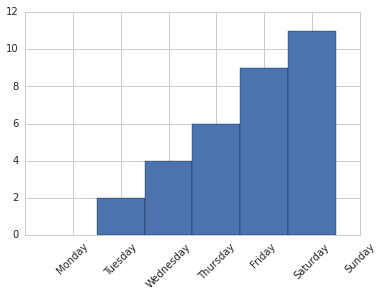

In [239]:
#dunno if correct

strikes['weekday']=strikes.apply(lambda x:x.weekday())

ax=strikes['weekday'].hist(xrot=45,bins=np.arange(-.5,6.5,1))
ax.xaxis.set_ticks([0,1,2,3,4,5,6])
ax.xaxis.set_ticklabels(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
# Why striking on saturday??????
